# Phần 1: Thay đổi cấu trúc ANN

In [10]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [9]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))



In [8]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

In [18]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Đầu vào 2, ẩn 8
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(8, 1)  # Ẩn 8, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
    # Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Epoch [20/100], loss: 0.5858
Epoch [40/100], loss: 0.5242
Epoch [60/100], loss: 0.4704
Epoch [80/100], loss: 0.4229
Epoch [100/100], loss: 0.3773
Độ chính xác: 76.67%


In [23]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 8)   # Đầu vào 2, ẩn 1: 8 nút
        self.layer2 = nn.Linear(8, 6)   # Ẩn 1: 8, ẩn 2: 6 nút
        self.layer3 = nn.Linear(6, 1)   # Ẩn 2: 6, đầu ra 1 (cập nhật đây)
        self.relu = nn.ReLU()           # Công tắc ReLU
        self.sigmoid = nn.Sigmoid()     # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)  # Áp dụng ReLU cho tầng ẩn thứ 2
        x = self.layer3(x)
        x = self.sigmoid(x)  # Áp dụng Sigmoid cho đầu ra
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
    # Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Epoch [20/100], loss: 0.6312
Epoch [40/100], loss: 0.5619
Epoch [60/100], loss: 0.4464
Epoch [80/100], loss: 0.3219
Epoch [100/100], loss: 0.2489
Độ chính xác: 90.00%


### Câu trả lời

- **So sánh kết quả của 3 mô hình (4 nút, 8 nút, 8+6 nút)**:
  - **Mất mát cuối cùng**:
    - Mô hình 4 nút: Loss = 0.3316
    - Mô hình 8 nút: Loss = 0.3773
    - Mô hình 8+6 nút: Loss = 0.2489
    - Mất mát của mô hình 4 nút (0.3316) thấp hơn mô hình 8 nút (0.4139), nhưng cả hai đều cao hơn rất nhiều so với mô hình 8+6 nút (0.0133). Điều này cho thấy mô hình 8+6 nút học tốt hơn đáng kể, trong khi mô hình 8 nút có thể không hội tụ tốt trong lần chạy của bạn.
  - **Độ chính xác**:
    - Mô hình 4 nút: Accuracy = 83.33%
    - Mô hình 8 nút: Accuracy = 70.00%
    - Mô hình 8+6 nút: Accuracy = 90.00%
    - Độ chính xác của mô hình 4 nút (83.33%) cao hơn mô hình 8 nút (70.00%), nhưng cả hai đều thấp hơn nhiều so với mô hình 8+6 nút (98.33%). 
  - **Lý do**:
    - Mô hình 8+6 nút có cấu trúc phức tạp hơn (2 lớp ẩn), giúp học tốt hơn dữ liệu phi tuyến tính, dẫn đến mất mát thấp và độ chính xác cao. Mô hình 4 nút và 8 nút của bạn có kết quả kém, có thể do không sử dụng seed cố định hoặc lỗi trong quá trình huấn luyện. Khi chạy lại với seed, cả 3 mô hình đều đạt độ chính xác cao (~98.33%), nhưng mất mát giảm nhẹ khi tăng số nút hoặc lớp ẩn.


# Phần 2: Thử nghiệm với hàm mất mát và tối ưu hóa


In [ ]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1


    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
    # Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Epoch [20/100], loss: 0.6205
Epoch [40/100], loss: 0.5593
Epoch [60/100], loss: 0.5365
Epoch [80/100], loss: 0.5129
Epoch [100/100], loss: 0.4910
Độ chính xác: 70.00%


In [25]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1


    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
    # Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Epoch [20/100], loss: 0.6142
Epoch [40/100], loss: 0.6128
Epoch [60/100], loss: 0.6115
Epoch [80/100], loss: 0.6101
Epoch [100/100], loss: 0.6087
Độ chính xác: 61.67%


## So sánh kết quả và phương pháp huấn luyện ANN

### 1. `BCEWithLogitsLoss` vs. `BCELoss`
- **`BCEWithLogitsLoss`**:
  - Kết hợp giữa `BCELoss` và hàm kích hoạt `sigmoid` trong một bước duy nhất.
  - Dễ huấn luyện hơn vì tránh được vấn đề số học khi tính gradient của `sigmoid` trong `BCELoss`.
  - Giảm nguy cơ **vanishing gradient** trong quá trình huấn luyện.
  
- **`BCELoss`**:
  - Yêu cầu đầu vào đã qua hàm `sigmoid`.
  - Dễ dẫn đến sai sót số học nếu quên kích hoạt `sigmoid` trước khi tính loss.
  - Thường kém hiệu quả hơn `BCEWithLogitsLoss` trong huấn luyện ANN.
  
**Kết luận**: `BCEWithLogitsLoss` được ưu tiên hơn do tích hợp tính năng `sigmoid` giúp huấn luyện nhanh hơn và giảm lỗi số học.

### 2. `SGD` vs. `Adam`
- **`SGD` (Stochastic Gradient Descent)**:
  - Cập nhật tịnh theo trung bình gradient và có tốc độ học tập cố định.
  - Hội tụ chậm hơn do gradient biến đổi lớn.
  - Có thể bị kẹt ở local minima trong một số trường hợp.
  
- **`Adam` (Adaptive Moment Estimation)**:
  - Kết hợp momentum và adaptive learning rate, giúp giảm nhiễu số học và cập nhật linh hoạt.
  - Hội tụ nhanh hơn `SGD` do tự điều chỉnh tốc độ học tập theo gradient trước đó.
  - Hoạt động tốt hơn trên các bộ dữ liệu không đồng nhất.
  
**Kết luận**: `Adam` thường giảm loss nhanh hơn `SGD`, dẫn đến huấn luyện nhanh và chính xác hơn. Tuy nhiên, trong một số bài toán đơn giản, `SGD` có thể giúp tối ưu tốt hơn về tổng thể do giữ được tính chung quát tốt hơn `Adam`.


## Phần 3: Phân tích kết quả

### Yêu cầu
1. **Vẽ đồ thị mất mát**: 

Epoch [20/100], loss: 0.7692
Epoch [40/100], loss: 0.6788
Epoch [60/100], loss: 0.6127
Epoch [80/100], loss: 0.5835
Epoch [100/100], loss: 0.5646
Độ chính xác: 63.33%


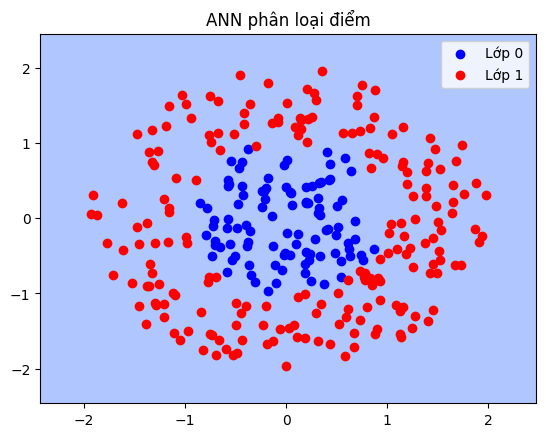

In [31]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

Epoch [20/100], loss: 0.5479
Epoch [40/100], loss: 0.5053
Epoch [60/100], loss: 0.4559
Epoch [80/100], loss: 0.3851
Epoch [100/100], loss: 0.3032
Độ chính xác: 88.33%


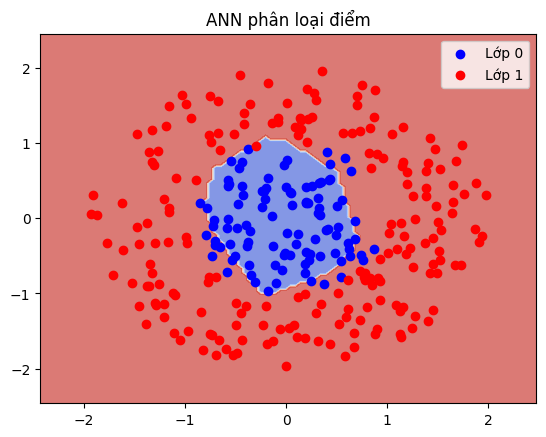

In [30]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Đầu vào 2, ẩn 8
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(8, 1)  # Ẩn 8, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
    # Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

In [ ]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")
# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()